In [1]:
#FIXA MILKYIELD-FILEN
#Importera filen
import pandas as pd
milk = pd.read_csv('C:/Users/pagd0001/Desktop/repositories/first_try/Gigacow-tools/Projects/HeatStressEvaluation/Data/CowData/GIGACOW/MilkYield_filtered.csv')

# remove some columns from milkyield_filtered.csv
milk_data = milk.drop(
    columns=[
        "Unnamed: 0",
        "Del_Cow_Id",
        "AnimalNumber",
        "LactationInfoSource",
        "SessionNumber",
        "OriginalFileSource",
        "dwh_factCowMilk_Id",
        "dwh_factCowMilkOther_Id",
    ]
)

In [2]:
# convert the 'TotalYield' to numeric format and replace commas with dots to handle decimal notation
# and finally use 'errors='coerce' to replace any conversion errors with NaN values
milk_data["TotalYield"] = pd.to_numeric(milk_data["TotalYield"].str.replace(",", "."), errors="coerce")

In [3]:
# convert to datetime format
milk_data["StartDate"] = pd.to_datetime(milk_data["StartDate"])
milk_data["DateTime"] = pd.to_datetime(milk_data["DateTime"])

# drop NaNs
milk_data = milk_data.dropna()  

# Make the Lactationnumber into an integer
milk_data = milk_data.astype({"LactationNumber": "int"})

In [129]:
"""
#SUBSET CHOSEN COW(S)
SE_Number = ["SE-a624fb9a-1412"] #SE-a624fb9a-1273"] #""] # "SE-a624fb9a-1426"] # 
select_cow = milk_data[milk_data["SE_Number"].isin(SE_Number)]
"""

In [4]:
#SORT ON SE_Number, STARTDATE AND TIME OF MILKING EVENT
sort_df = milk_data.sort_values(by=['SE_Number', 'StartDate', 'StartTime']) #ALT, if want specific cow: select_cow! milk_data otherwise
print(sort_df.dtypes)
print(sort_df.shape) #375384, 8

FarmName_Pseudo            object
SE_Number                  object
StartDate          datetime64[ns]
StartTime                  object
LactationNumber             int32
DaysInMilk                float64
TotalYield                float64
DateTime           datetime64[ns]
dtype: object
(375384, 8)


In [5]:
# Save under 'Preprocessing' as 'ICAR1.csv'
sort_df.to_csv("ICAR1.csv", index=False)
print(sort_df.shape) #375384, 8

(375384, 8)


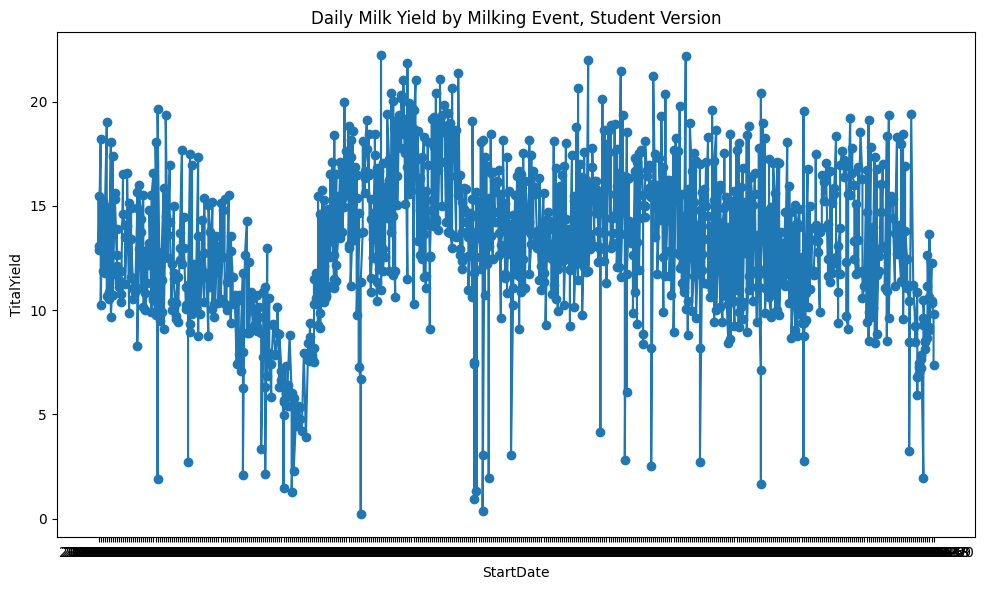

In [6]:
# PLOTTING DAILY MILK YIELD
#IMPORT DATA
import pandas as pd
df = pd.read_csv("ICAR1.csv")

#SUBSET CHOSEN COW(S)
SE_Number = ["SE-a624fb9a-1162"] #SE-a624fb9a-1412"] #"SE-a624fb9a-1273"] #"SE-a624fb9a-1412"] # "SE-a624fb9a-1426"] #
df = df[df["SE_Number"].isin(SE_Number)]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['StartDate'], df['TotalYield'], marker='o', linestyle='-')
plt.title('Daily Milk Yield by Milking Event, Student Version')
plt.xlabel('StartDate')
plt.ylabel('TitalYield')
#plt.grid(True)
plt.tight_layout()
plt.show()

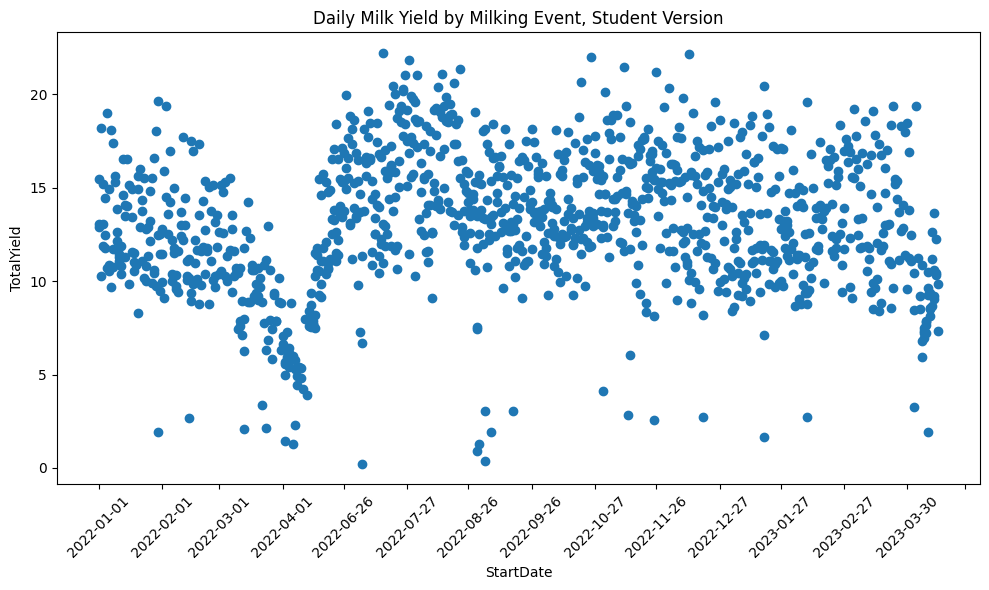

In [7]:
#PLOTTING DAILY MILK YIELD, NO LINE
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

dates = pd.date_range(start='2022-01-01', end='2023-11-13')

plt.figure(figsize=(10, 6))
plt.scatter(df['StartDate'], df['TotalYield'], marker='o')
plt.title('Daily Milk Yield by Milking Event, Student Version')
plt.xlabel('StartDate')
plt.ylabel('TotalYield')
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
#plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
#SUMMARIZE MILK YIELD BY DAY
import pandas as pd
df = pd.read_csv("ICAR1.csv")
print(df.shape)

#Keep only columns 
col_keep = ["FarmName_Pseudo","SE_Number",'StartDate', "DaysInMilk",'TotalYield']
df_subset = df.loc[:, col_keep]
print(df_subset)
print(df_subset.dtypes)

# Convert 'StartDate' column to datetime type
df_subset['StartDate'] = pd.to_datetime(df['StartDate']) 

# Summarize daily milk yield by cow and date
MY_tot = df_subset.groupby(["SE_Number",'StartDate'])['TotalYield'].sum()

# Merge the summarized data back into the original DataFrame
df_sum = df_subset.merge(MY_tot, on='StartDate', suffixes=('', ' sum'))
print(df_sum)
print(df_sum.dtypes)

#Keep only one obs per day
df2 = df_sum.drop_duplicates(subset=["SE_Number", "StartDate"], keep="first")
print(df2)
print(df2.shape) #144788, 6

#Keep only columns 
col_keep = ["FarmName_Pseudo","SE_Number",'StartDate', "DaysInMilk",'TotalYield sum']
df_subset2 = df2.loc[:, col_keep]
print(df_subset2)

df_subset2.to_csv("ICAR1.csv", index=False)

(375384, 8)
       FarmName_Pseudo           SE_Number   StartDate  DaysInMilk  TotalYield
0             a624fb9a    SE-064c0cec-1189  2022-01-01       191.0       13.90
1             a624fb9a    SE-064c0cec-1189  2022-01-01       191.0       16.87
2             a624fb9a    SE-064c0cec-1189  2022-01-02       192.0       16.28
3             a624fb9a    SE-064c0cec-1189  2022-01-02       192.0       20.41
4             a624fb9a    SE-064c0cec-1189  2022-01-02       192.0       11.53
...                ...                 ...         ...         ...         ...
375379        f454e660  SE-fcdf259d-0044-0  2023-06-10       354.0        4.70
375380        f454e660  SE-fcdf259d-0044-0  2023-06-10       354.0        2.87
375381        f454e660  SE-fcdf259d-0044-0  2023-06-11       355.0        2.37
375382        f454e660  SE-fcdf259d-0044-0  2023-06-12       356.0       12.27
375383        f454e660  SE-fcdf259d-0044-0  2023-06-13       357.0        7.96

[375384 rows x 5 columns]
FarmName_Pseu

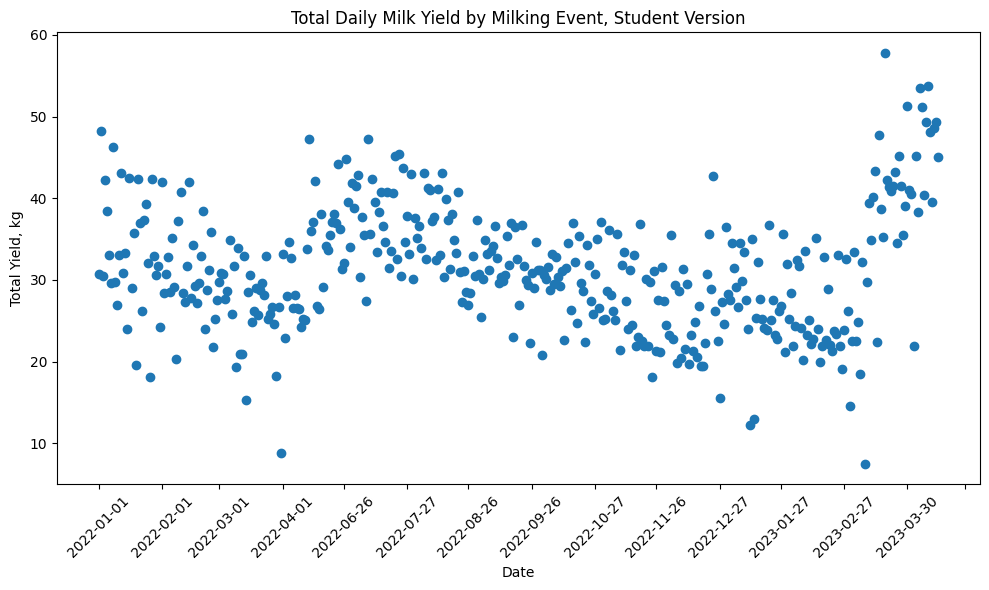

In [9]:
#PLOTTING SUMMARIZED MILK YIELD
#IMPORT DATA
df = pd.read_csv("ICAR1.csv")

#SUBSET CHOSEN COW(S)
SE_Number = ["SE-a624fb9a-1162"] #SE-a624fb9a-1412"] #"SE-a624fb9a-1273"] #] # "SE-a624fb9a-1426"] #
select_cow = df[df["SE_Number"].isin(SE_Number)]

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

dates = pd.date_range(start='2022-01-01', end='2023-11-13')

plt.figure(figsize=(10, 6))
plt.scatter(select_cow['StartDate'], select_cow['TotalYield sum'], marker='o')
plt.title('Total Daily Milk Yield by Milking Event, Student Version')
plt.xlabel('Date')
plt.ylabel('Total Yield, kg')
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
#plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
#LACT CURVES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

from tqdm import tqdm
import seaborn as sns

df2 = pd.read_csv("ICAR1.csv")

# Define the Wood's Lactation Curve function
def woods_lactation_curve(dim, a, b, c):
    dim = np.array(dim, dtype=float)
    return a * dim ** b * np.exp(-c * dim)


# Function to fit the Wood's Lactation Curve to the dataset
def fit_woods_lactation_curve(df3):
    # Initialize the 'ExpectedYield' column to NaN
    df2['ExpectedYield'] = np.nan
    
    # Group the dataset by 'SE_Number' and fit the curve for each cow
    for animal_number, group in tqdm(df2.groupby('SE_Number')):
        # Prepare the data for fitting
        x_data = group['DaysInMilk']
        y_data = group['TotalYield sum']
        
        # Fit the model
        try:
            # Initial parameter guesses
            initial_guesses = [max(y_data), 0.4, 0.0001]
            # Bounds on the parameters to prevent overflow
            bounds = ([0, 0, 0], [np.inf, 1, 0.1])
            popt, pcov = curve_fit(
                woods_lactation_curve, x_data, y_data,
                p0=initial_guesses, bounds=bounds, maxfev=10000
            )

            # Predict the expected yield using the fitted model
            group['ExpectedYield'] = woods_lactation_curve(group['DaysInMilk'], *popt)

            # Normalize the DailyTotalYield
            group['NormalizedDailyTotalYield'] = group['TotalYield sum'] / group['ExpectedYield']

            # Calculate the daily yield change and normalize it

            # Update the dataset with the fitted data
            df2.loc[group.index, 'ExpectedYield'] = group['ExpectedYield']
            df2.loc[group.index, 'NormalizedDailyTotalYield'] = group['NormalizedDailyTotalYield']

        except RuntimeError as e:
            print(f"Curve fit failed for cow {animal_number}: {e}")

    # Fill any NaN values in the newly created columns with 0
    df2['ExpectedYield'].fillna(0, inplace=True)
    df2['NormalizedDailyTotalYield'].fillna(0, inplace=True)

    return df2

df2 = fit_woods_lactation_curve(df2)
print(df2.head())

  0%|          | 0/376 [00:00<?, ?it/s]C:\Users\pagd0001\AppData\Local\Temp\ipykernel_17340\753686841.py:35: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(
 98%|█████████▊| 368/376 [00:04<00:00, 60.38it/s] C:\Users\pagd0001\AppData\Local\Temp\ipykernel_17340\753686841.py:35: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(
100%|██████████| 376/376 [00:05<00:00, 73.98it/s]

  FarmName_Pseudo         SE_Number   StartDate  DaysInMilk  TotalYield sum  \
0        a624fb9a  SE-064c0cec-1189  2022-01-01       191.0           30.77   
1        a624fb9a  SE-064c0cec-1189  2022-01-02       192.0           48.22   
2        a624fb9a  SE-064c0cec-1189  2022-01-03       193.0           30.53   
3        a624fb9a  SE-064c0cec-1189  2022-01-04       194.0           42.26   
4        a624fb9a  SE-064c0cec-1189  2022-01-05       195.0           38.49   

   ExpectedYield  NormalizedDailyTotalYield  
0      29.759508                   1.033955  
1      29.712387                   1.622892  
2      29.665277                   1.029149  
3      29.618178                   1.426826  
4      29.571090                   1.301609  



C:\Users\pagd0001\AppData\Local\Temp\ipykernel_17340\753686841.py:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['ExpectedYield'].fillna(0, inplace=True)
C:\Users\pagd0001\AppData\Local\Temp\ipykernel_17340\753686841.py:57: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [11]:
#FILTERING
#Remove colostrum
df3=df2[df2["DaysInMilk"] >3.0]

#ADJUST MY: dry off period, use calving date instead

# Save under 'Preprocessing' as 'ICAR1.csv'
df3.to_csv("ICAR1.csv", index=False) #ICAR1_filt.csv tidigare
print(df3.shape) #144225, 7

(144225, 7)


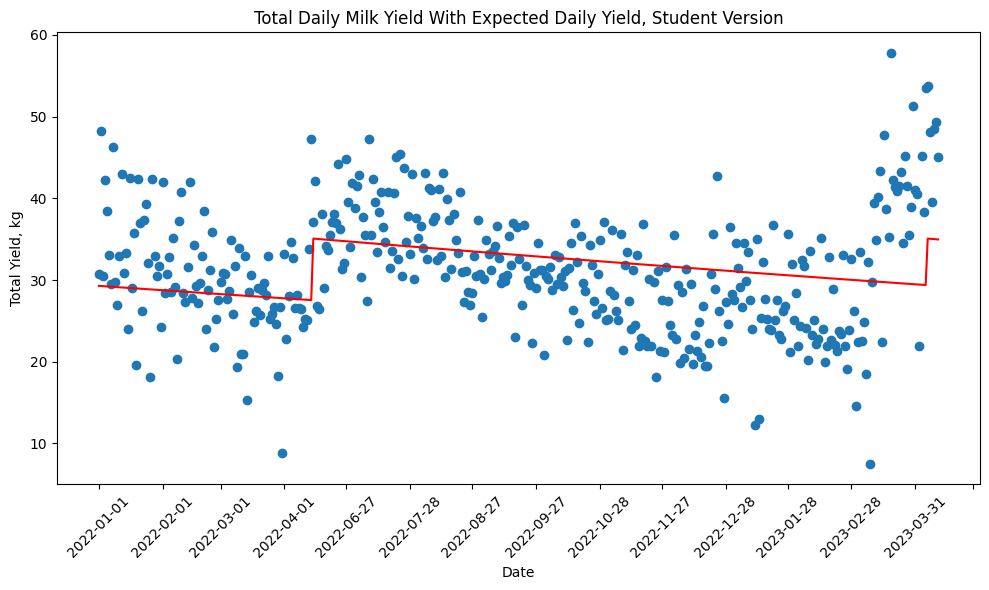

In [12]:
#SUBSET CHOSEN COW(S)
SE_Number = ["SE-a624fb9a-1162"] #"SE-a624fb9a-1273"] #"SE-a624fb9a-1412"] # "SE-a624fb9a-1426"] #
select_cow = df3[df3["SE_Number"].isin(SE_Number)]

#PLOTTING TOTAL MILK YIELD WITH WOODS LACT CURVE
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
dates = pd.date_range(start='2022-01-01', end='2023-11-13')

plt.figure(figsize=(10, 6))
plt.scatter(select_cow['StartDate'], select_cow['TotalYield sum'], marker='o')
plt.plot(select_cow['StartDate'], select_cow['ExpectedYield'], color="r")
plt.title('Total Daily Milk Yield With Expected Daily Yield, Student Version')
plt.xlabel('Date')
plt.ylabel('Total Yield, kg')
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
#ADD COLUMN WITH GENERATED DATE VALUES FOR MISSING DATA FOR WOODS LACT CURVE BETWEEN LACT
#Import dataset
df4 = pd.read_csv("ICAR1.csv") #ICAR1_filt.csv tidigare

#Adding Date Variable for Each Animal Separately
cols = ['SE_Number','StartDate']
start_date = '2022-01-01'
end_date = '2023-11-13'

df4['StartDate'] = pd.to_datetime(df4['StartDate'])

df5 = (df4.set_index(cols)
      .reindex(pd.MultiIndex.from_product([df4['SE_Number'].unique(),pd.date_range(start_date,end_date,freq='D')],names = cols))
      .fillna(0)
      .sort_index()
      .reset_index())

df5.loc[(df5["DaysInMilk"] == 0.0) & (df5["TotalYield sum"] == 0.0)
    & (df5["ExpectedYield"] == 0.0) & (df5["NormalizedDailyTotalYield"] == 0.0),
    ["DaysInMilk", "TotalYield sum", "ExpectedYield", "NormalizedDailyTotalYield"]] = pd.NA

#Make new variable with only 4-305DIM
df5["MY_tot305"] = df5["TotalYield sum"]
df5.loc[df5["DaysInMilk"] >= 306.0, ["MY_tot305"]] = pd.NA

print(df5) #256432 rows x 9 columns

# Save under 'Preprocessing'
df5.to_csv("ICAR1.csv", index=False) #ICAR1_filt.csv tidigare

                 SE_Number  StartDate FarmName_Pseudo  DaysInMilk  \
0         SE-064c0cec-1189 2022-01-01        a624fb9a       191.0   
1         SE-064c0cec-1189 2022-01-02        a624fb9a       192.0   
2         SE-064c0cec-1189 2022-01-03        a624fb9a       193.0   
3         SE-064c0cec-1189 2022-01-04        a624fb9a       194.0   
4         SE-064c0cec-1189 2022-01-05        a624fb9a       195.0   
...                    ...        ...             ...         ...   
256427  SE-fcdf259d-0044-0 2023-11-09               0         NaN   
256428  SE-fcdf259d-0044-0 2023-11-10               0         NaN   
256429  SE-fcdf259d-0044-0 2023-11-11               0         NaN   
256430  SE-fcdf259d-0044-0 2023-11-12               0         NaN   
256431  SE-fcdf259d-0044-0 2023-11-13               0         NaN   

        TotalYield sum  ExpectedYield  NormalizedDailyTotalYield  MY_tot305  
0                30.77      29.759508                   1.033955      30.77  
1              

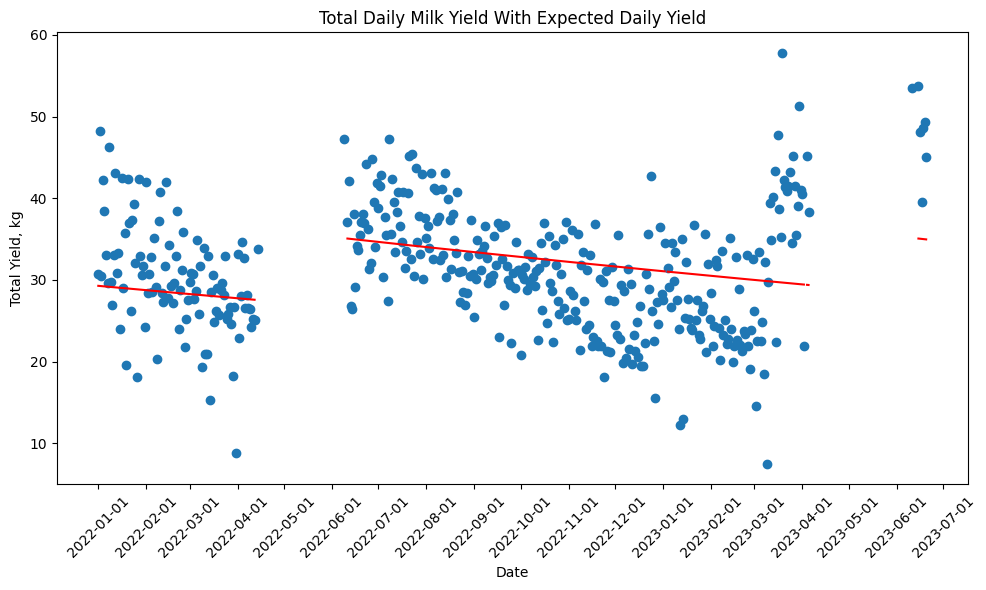

In [14]:
#PLOTTING TITAL MILK YIELD WITH WOODS LACT CURVE
#Import dataset
df5 = pd.read_csv("ICAR1.csv") #ICAR1_filt.csv

#SUBSET CHOSEN COW(S)
SE_Number = ["SE-a624fb9a-1162"] #"SE-a624fb9a-1412"] #SE-a624fb9a-1273"] #""] # "SE-a624fb9a-1426"] # 
select_cow = df5[df5["SE_Number"].isin(SE_Number)]

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
dates = pd.date_range(start='2022-01-01', end='2023-11-13')

plt.figure(figsize=(10, 6))
plt.scatter(select_cow['StartDate'], select_cow['TotalYield sum'], marker='o')
plt.plot(select_cow['StartDate'], select_cow['ExpectedYield'], label='Wood_lact_curve', color="r")
plt.title('Total Daily Milk Yield With Expected Daily Yield')
plt.xlabel('Date')
plt.ylabel('Total Yield, kg')
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

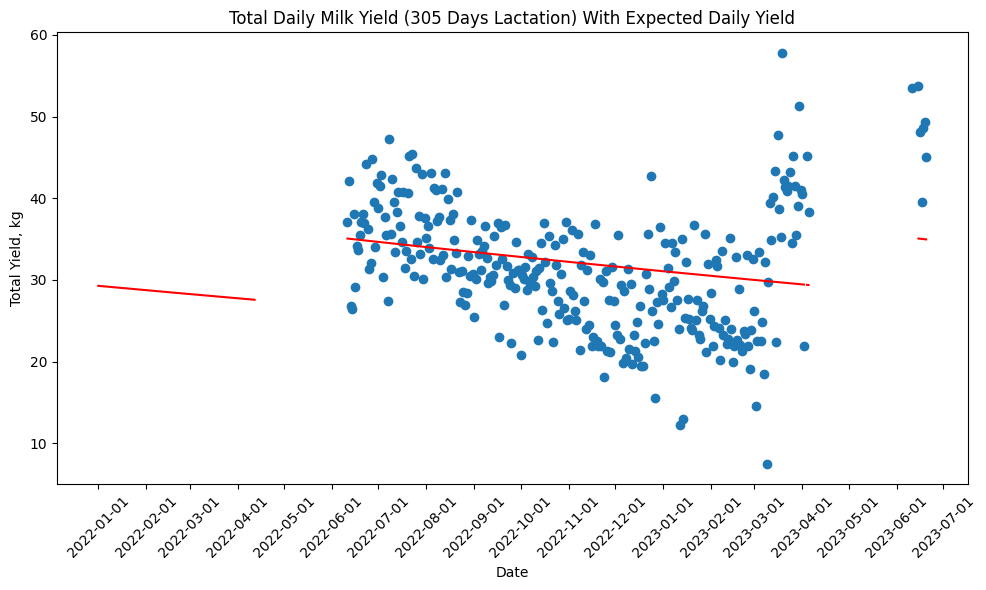

In [15]:
#PLOTTING TOTAL 305D MILK YIELD WITH WOODS LACT CURVE
#Import dataset
df5 = pd.read_csv("ICAR1.csv") #ICAR1_filt.csv

#SUBSET CHOSEN COW(S)
SE_Number = ["SE-a624fb9a-1162"] #"SE-a624fb9a-1412"] #SE-a624fb9a-1273"] #""] # "SE-a624fb9a-1426"] # 
select_cow = df5[df5["SE_Number"].isin(SE_Number)]


import matplotlib.pyplot as plt
import matplotlib.dates as mdates
dates = pd.date_range(start='2022-01-01', end='2023-11-13')

plt.figure(figsize=(10, 6))
plt.scatter(select_cow['StartDate'], select_cow['MY_tot305'], marker='o')
plt.plot(select_cow['StartDate'], select_cow['ExpectedYield'], label='Wood_lact_curve', color="r")
plt.title('Total Daily Milk Yield (305 Days Lactation) With Expected Daily Yield')
plt.xlabel('Date')
plt.ylabel('Total Yield, kg')
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
#WEATHER DATA - HERD a624fb9a
import pandas as pd
dfw = pd.read_csv("C:/Users/pagd0001/Desktop/repositories/first_try/Gigacow-tools/Projects/HeatStressEvaluation/Data/TheData.csv")
print(dfw)
"""
#SUBSET CHOSEN COW(S) #all of f454e660 chosen cows are missing, milked in VMS?
SE_Number = ["SE-f454e660_0706"]
cowtest = dfw[dfw["SE_Number"].isin(SE_Number)]
cowtest.to_csv("ICAR2e.csv", index=False)
"""

       FarmName_Pseudo         SE_Number  AnimalNumber   StartDate StartTime  \
0             a624fb9a  SE-a624fb9a-1273          1273  2022-02-18  11:03:00   
1             a624fb9a  SE-a624fb9a-1405          1405  2022-05-19  12:04:00   
2             a624fb9a  SE-064c0cec-1189          5189  2022-08-05  12:41:00   
3             a624fb9a  SE-a624fb9a-1394          1394  2022-03-22  20:20:00   
4             a624fb9a  SE-a624fb9a-1408          1408  2022-04-25  15:30:00   
...                ...               ...           ...         ...       ...   
371001        f454e660  SE-f454e660-0508           508  2023-11-13  00:38:00   
371002        f454e660  SE-f454e660-0338           338  2023-11-13  00:46:00   
371003        f454e660  SE-f454e660-0710           710  2023-11-13  00:46:00   
371004        f454e660  SE-f454e660-0157           157  2023-11-13  00:52:00   
371005        f454e660  SE-f454e660-0487           487  2023-11-13  00:53:00   

        LactationNumber  DaysInMilk  To

'\n#SUBSET CHOSEN COW(S) #all of f454e660 chosen cows are missing, milked in VMS?\nSE_Number = ["SE-f454e660_0706"]\ncowtest = dfw[dfw["SE_Number"].isin(SE_Number)]\ncowtest.to_csv("ICAR2e.csv", index=False)\n'

In [17]:
#SUBSET CHOSEN HERD
FarmName_Pseudo = ["a624fb9a"]
dfw2 = dfw[dfw["FarmName_Pseudo"].isin(FarmName_Pseudo)]

#SORT BY StartDate
dfw3 = dfw2.sort_values(by=['FarmName_Pseudo', "SE_Number", 'StartDate', "StartTime"]) #dfw

# Save under 'Preprocessing' as 'ICAR_weather.csv'
dfw3.to_csv("ICAR_weather_a624fb9a.csv", index=False) #ICAR1_weather.csv tidigare

In [18]:
#MAKE VARIABLES FOR WEATHER DATA
DATA = dfw3.copy()

agg_functions = {
        'FarmName_Pseudo': 'first',
        'TotalYield': ['sum', 'mean'], # Daily sum of all the yields. Can be replaced with 'mean' to get daily mean instead
        'HW': 'first', # Since the HW indicator will be the same for all instances of the same day (given the same farm), we save the 'first'
        'cum_HW': 'first', # Same as for 'HW'
        'DaysInMilk': 'first', # Same as for 'HW'
        'LactationNumber': 'first', # Same as for 'HW'
        'Temperature': ['mean', 'max', 'min'], #Save both the daily Max temperature as well as daily mean temperature
        'Relative Humidity': 'mean', # Save daily mean humidity
        'THI_adj': 'mean' # save daily mean THI-adjusted
    }

breed_dummies = pd.get_dummies(DATA['BreedName'], prefix='Breed').astype(int)
breed_agg_functions = {breed: 'first' for breed in list(breed_dummies.columns)}
DATA = pd.get_dummies(DATA, columns=['BreedName'], prefix='Breed', dtype=int)

agg_functions = {**agg_functions, **breed_agg_functions}
daily_DATA = DATA.groupby(['SE_Number', 'StartDate']).agg(agg_functions).reset_index() #Group by day (StartDate)

# Remove the weird 'first' prefixes from the column names
daily_DATA.columns = [' '.join(col).strip() if 'first' not in col[1] else col[0] for col in daily_DATA.columns.values] 

new_col_names = {
    'TotalYield sum': 'DailyTotalYield',
    'TotalYield mean': 'DailyMeanMilkYield',
    'DaysInMilk first': 'DaysInMilk',
    'Temperature mean': 'MeanTemperature',
    'Temperature max': 'MaxTemperature',
    'Temperature min': 'MinTemperature',
    'Relative Humidity mean': 'MeanRelHumidity',
    'THI_adj mean': 'MeanTHI_adj'
}

daily_DATA.rename(columns=new_col_names, inplace=True)
print(daily_DATA.head())
print(daily_DATA.shape) #144502, 19 #60495, 16

          SE_Number   StartDate FarmName_Pseudo  DailyTotalYield  \
0  SE-064c0cec-1189  2022-01-01        a624fb9a            30.77   
1  SE-064c0cec-1189  2022-01-02        a624fb9a            48.22   
2  SE-064c0cec-1189  2022-01-03        a624fb9a            30.53   
3  SE-064c0cec-1189  2022-01-04        a624fb9a            42.26   
4  SE-064c0cec-1189  2022-01-05        a624fb9a            38.49   

   DailyMeanMilkYield  HW  cum_HW  DaysInMilk  LactationNumber  \
0           15.385000   0     0.0       191.0                7   
1           16.073333   0     0.0       192.0                7   
2           15.265000   0     0.0       193.0                7   
3           14.086667   0     0.0       194.0                7   
4           12.830000   0     0.0       195.0                7   

   MeanTemperature  MaxTemperature  MinTemperature  MeanRelHumidity  \
0        -3.150000            -2.3            -4.0         0.929000   
1        -0.500000             0.3            -2.1  

In [19]:

# Select columns that are not duplicated
#df_unique = daily_DATA.loc[:, ~daily_DATA.columns.duplicated()]
#print(df_unique.head())
#print(df_unique.shape)
"""
#SUBSET CHOSEN COW(S)
SE_Number = ["SE-a624fb9a-1162"]  #SE-a624fb9a-1273"] #"SE-a624fb9a-1412"] # "SE-a624fb9a-1426"] # 
select_cow2 = daily_DATA[daily_DATA["SE_Number"].isin(SE_Number)]
print(select_cow2.head())
"""
#FILTERING
#Remove colostrum
select_cow3=daily_DATA[daily_DATA["DaysInMilk"] >3.0] #select_cow2
#Remove above 305DIM
#select_cow4=select_cow3[select_cow3["DaysInMilk"] <306.0]

# Save under 'Preprocessing' to look at
select_cow3.to_csv("ICAR_weather_a624fb9a.csv", index=False) #select_cow4 #ICAR2a.csv tidigare

In [20]:
#SORT AND GENERATED DATE VALUES FOR MISSING DATA FOR WEATHER DATA
df5 = pd.read_csv("ICAR_weather_a624fb9a.csv") #ICAR2a.csv

df5 = df5.sort_values(by=["FarmName_Pseudo", 'StartDate'])
print(df5.head())
print(df5.shape)
print(df5.dtypes)

#Adding Date Variable for Each Animal Separately
cols = ['SE_Number','StartDate']
start_date = '2022-01-01'
end_date = '2023-11-13'

df5['StartDate'] = pd.to_datetime(df5['StartDate'])

df6 = (df5.set_index(cols)
      .reindex(pd.MultiIndex.from_product([df5['SE_Number'].unique(),pd.date_range(start_date,end_date,freq='D')],names = cols))
      .fillna(0)
      .sort_index()
      .reset_index())

#FILL HERDNAME AND PUT OBS TO MISSING
df6.loc[(df6["FarmName_Pseudo"] == 0), "FarmName_Pseudo"] = "a624fb9a"
df6.loc[(df6["DailyTotalYield"] == 0.0) & (df6["DailyMeanMilkYield"] == 0.0)
    & (df6["LactationNumber"] == 0.0) & (df6["DaysInMilk"] == 0.0),
    ["DailyTotalYield", "DailyMeanMilkYield", "cum_HW", "HW", "DaysInMilk", "LactationNumber", 
     "MeanTemperature","MaxTemperature","MinTemperature","MeanRelHumidity","MeanTHI_adj","Breed_01 SRB","Breed_02 SLB"]] = pd.NA 

df6.to_csv("ICAR_weather_a624fb9a.csv", index=False) #ICAR2b.csv

             SE_Number   StartDate FarmName_Pseudo  DailyTotalYield  \
0     SE-064c0cec-1189  2022-01-01        a624fb9a            30.77   
294   SE-30dc5787-1389  2022-01-01        a624fb9a            32.67   
822   SE-30dc5787-1396  2022-01-01        a624fb9a            41.75   
1362  SE-30dc5787-1402  2022-01-01        a624fb9a            17.84   
1773  SE-a624fb9a-1162  2022-01-01        a624fb9a            41.43   

      DailyMeanMilkYield  HW  cum_HW  DaysInMilk  LactationNumber  \
0              15.385000   0     0.0       191.0                7   
294            16.335000   0     0.0       250.0                5   
822            13.916667   0     0.0       184.0                5   
1362            8.920000   0     0.0        23.0                5   
1773           13.810000   0     0.0       308.0                5   

      MeanTemperature  MaxTemperature  MinTemperature  MeanRelHumidity  \
0           -3.150000            -2.3            -4.0         0.929000   
294       

In [21]:
#Load data
df7 = pd.read_csv("ICAR_weather_a624fb9a.csv") #ICAR2b.csv
col_keep = ["SE_Number", "StartDate","FarmName_Pseudo","DaysInMilk","LactationNumber","DailyTotalYield",
            "DailyMeanMilkYield", "Breed_01 SRB","Breed_02 SLB"]
df8 = df7[col_keep]
print(df8) #106392 rows x 7 columns

#Find weather data
df9 = df7[df7["DailyTotalYield"].notna()]
#df9.to_csv("ICAR2c.csv", index=False)

#Save only one rec per herd and day
df9 = df9.drop_duplicates(subset=["FarmName_Pseudo", "StartDate"])
print(df9.shape) #681, 16
#df9.to_csv("ICAR2c.csv", index=False)

#Remove stuff
df9 = df9.drop(columns=["SE_Number", "DailyTotalYield", "DailyMeanMilkYield", "DaysInMilk", 
                        "LactationNumber", "Breed_01 SRB", "Breed_02 SLB"])
print(df9)

# convert to datetime format
df8["StartDate"] = pd.to_datetime(df8["StartDate"])
df9["StartDate"] = pd.to_datetime(df9["StartDate"])

#Sort by herd and date
df9=df9.sort_values(by=["FarmName_Pseudo", "StartDate"])
#df9.to_csv("ICAR2c.csv", index=False)

#MERGE
df10 = df8.merge(df9, on=["FarmName_Pseudo", "StartDate"], how="outer")
print(df10.head())
print(df10.shape) #106392, 16

df10=df10.sort_values(by=["FarmName_Pseudo", "SE_Number","StartDate"])
print(df10.dtypes)
df10.to_csv("ICAR_weather_a624fb9a.csv", index=False) #ICAR2d.csv tidigare

               SE_Number   StartDate FarmName_Pseudo  DaysInMilk  \
0       SE-064c0cec-1189  2022-01-01        a624fb9a       191.0   
1       SE-064c0cec-1189  2022-01-02        a624fb9a       192.0   
2       SE-064c0cec-1189  2022-01-03        a624fb9a       193.0   
3       SE-064c0cec-1189  2022-01-04        a624fb9a       194.0   
4       SE-064c0cec-1189  2022-01-05        a624fb9a       195.0   
...                  ...         ...             ...         ...   
106387  SE-ab921e32-0602  2023-11-09        a624fb9a         NaN   
106388  SE-ab921e32-0602  2023-11-10        a624fb9a         NaN   
106389  SE-ab921e32-0602  2023-11-11        a624fb9a         NaN   
106390  SE-ab921e32-0602  2023-11-12        a624fb9a         NaN   
106391  SE-ab921e32-0602  2023-11-13        a624fb9a         NaN   

        LactationNumber  DailyTotalYield  DailyMeanMilkYield  Breed_01 SRB  \
0                   7.0            30.77           15.385000           0.0   
1                   7.0    

C:\Users\pagd0001\AppData\Local\Temp\ipykernel_17340\3134629802.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8["StartDate"] = pd.to_datetime(df8["StartDate"])


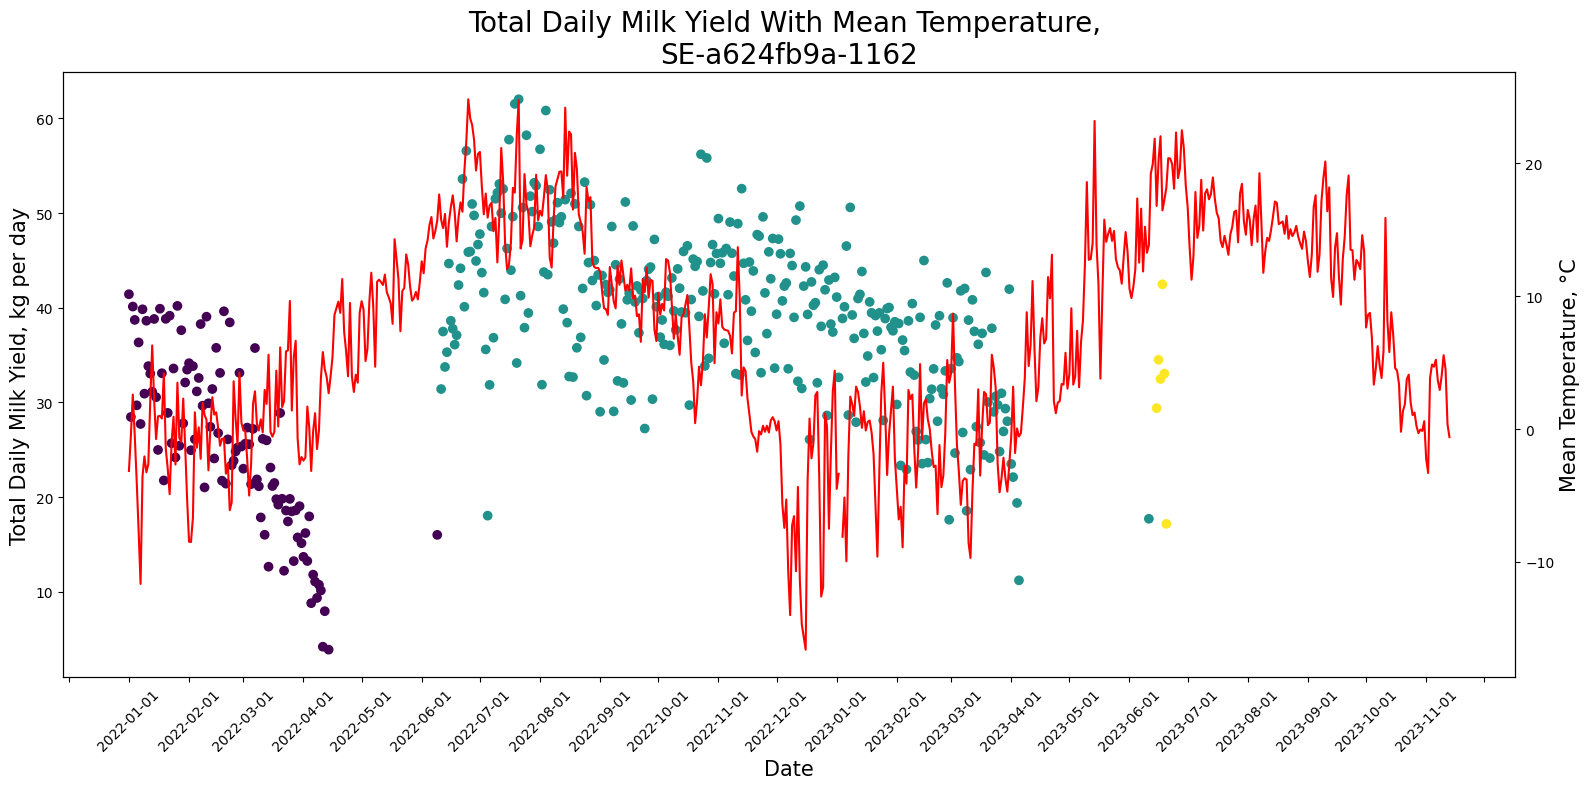

In [22]:
#MY x MEANTEMP
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("ICAR_weather_a624fb9a.csv") #ICAR2d.csv
#SUBSET CHOSEN COW(S)
SE_Number = ["SE-a624fb9a-1162"]  #SE-a624fb9a-1273"] #"SE-a624fb9a-1412"] # "SE-a624fb9a-1426"] # 
df = df[df["SE_Number"].isin(SE_Number)]

#dates = pd.date_range(start='2022-01-01', end='2023-11-13', periods=30)

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(16, 8))

# Plot the first y-axis (Milk Yield)
ax1.scatter(df['StartDate'], df['DailyTotalYield'], c=df['LactationNumber'])
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Total Daily Milk Yield, kg per day', fontsize=15)
ax1.tick_params(axis='y')
plt.xticks(rotation=45)
plt.title('Total Daily Milk Yield With Mean Temperature, \nSE-a624fb9a-1162', fontsize=20)
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx() # instantiate a second Axes that shares the same x-axis
ax2.plot(df['StartDate'], df['MeanTemperature'], color='r')
ax2.set_ylabel('Mean Temperature, °C', fontsize=15)
ax2.tick_params(axis='y')

# Adjust layout to prevent overlap
fig.tight_layout()
plt.show()

In [41]:
#TO PLOT PANEL
import pandas as pd

#SUBSET CHOSEN COW(S)
SE_Number1 = ["SE-a624fb9a-1197"]
SE_Number2 = ["SE-a624fb9a-1251"]
SE_Number3 = ["SE-a624fb9a-1265"]
SE_Number4 = ["SE-a624fb9a-1322"]
SE_Number5 = ["SE-a624fb9a-1162"]
SE_Number6 = ["SE-a624fb9a-1193"]

df10 = pd.read_csv("ICAR_weather_a624fb9a.csv") #ICAR2d.csv
#DATA = df10.copy()
col_keep = ["SE_Number","StartDate","LactationNumber","DailyTotalYield", "MeanTemperature"]
df10 = df10[col_keep]

select_cow1 = df10[df10["SE_Number"].isin(SE_Number1)].copy()
print(select_cow1)
select_cow2 = df10[df10["SE_Number"].isin(SE_Number2)].copy()
select_cow3 = df10[df10["SE_Number"].isin(SE_Number3)].copy()
select_cow4 = df10[df10["SE_Number"].isin(SE_Number4)].copy()
select_cow5 = df10[df10["SE_Number"].isin(SE_Number5)].copy()
select_cow6 = df10[df10["SE_Number"].isin(SE_Number6)].copy()

#SUBSET1
new_col_name1 = {
    "SE_Number":"sweid1",
    "StartDate":"Start1",
    "LactationNumber":"Lact1",
    "DailyTotalYield":"DTY1", 
    "MeanTemperature":"MT1"
}
select_cow1.rename(columns=new_col_name1, inplace=True)
print(select_cow1)

#SUBSET2
new_col_name2 = {
    "SE_Number":"sweid2",
    "StartDate":"Start2",
    "LactationNumber":"Lact2",
    "DailyTotalYield":"DTY2", 
    "MeanTemperature":"MT2"
}
select_cow2.rename(columns=new_col_name2, inplace=True)

#SUBSET3
new_col_name3 = {
    "SE_Number":"sweid3",
    "StartDate":"Start3",
    "LactationNumber":"Lact3",
    "DailyTotalYield":"DTY3", 
    "MeanTemperature":"MT3"
}
select_cow3.rename(columns=new_col_name3, inplace=True)

#SUBSET4
new_col_name4 = {
    "SE_Number":"sweid4",
    "StartDate":"Start4",
    "LactationNumber":"Lact4",
    "DailyTotalYield":"DTY4", 
    "MeanTemperature":"MT4"
}
select_cow4.rename(columns=new_col_name4, inplace=True)

#SUBSET5
new_col_name5 = {
    "SE_Number":"sweid5",
    "StartDate":"Start5",
    "LactationNumber":"Lact5",
    "DailyTotalYield":"DTY5", 
    "MeanTemperature":"MT5"
}
select_cow5.rename(columns=new_col_name5, inplace=True)

#SUBSET6
new_col_name6 = {
    "SE_Number":"sweid6",
    "StartDate":"Start6",
    "LactationNumber":"Lact6",
    "DailyTotalYield":"DTY6", 
    "MeanTemperature":"MT6"
}
select_cow6.rename(columns=new_col_name6, inplace=True)

#CONCAT
select_cow = pd.concat([select_cow1, select_cow2, select_cow3, select_cow4, select_cow5, select_cow6])
print(select_cow)
print(select_cow.shape)

# convert to numeric format, use 'errors='coerce' to replace any conversion errors with NaN values
select_cow["Lact1"] = pd.to_numeric(select_cow["Lact1"], errors="coerce")
select_cow["DTY1"] = pd.to_numeric(select_cow["DTY1"], errors="coerce")
select_cow["MT1"] = pd.to_numeric(select_cow["MT1"], errors="coerce")
# convert to datetime format
select_cow["Start1"] = pd.to_datetime(select_cow["Start1"], errors="coerce")

# Convert columns from float cuz reasons
#select_cow["Lact1"] = select_cow["Lact1"].astype(int)
#select_cow = select_cow.astype({"Lact1": complex, "DTY1": complex, "MT1":complex})
#select_cow["DTY1"] = select_cow["DTY1"].astype(int)
#select_cow["MT1"] = select_cow["MT1"].astype(int)
#print(select_cow.dtypes)


#select_cow = select_cow.astype(int)

print(select_cow.dtypes)

select_cow.to_csv("ICAR2f.csv", index=False)


             SE_Number   StartDate  LactationNumber  DailyTotalYield  \
6820  SE-a624fb9a-1197  2022-01-01              5.0            21.69   
6821  SE-a624fb9a-1197  2022-01-02              5.0            25.10   
6822  SE-a624fb9a-1197  2022-01-03              5.0            17.55   
6823  SE-a624fb9a-1197  2022-01-04              5.0            27.02   
6824  SE-a624fb9a-1197  2022-01-05              5.0            19.90   
...                ...         ...              ...              ...   
7497  SE-a624fb9a-1197  2023-11-09              NaN              NaN   
7498  SE-a624fb9a-1197  2023-11-10              NaN              NaN   
7499  SE-a624fb9a-1197  2023-11-11              NaN              NaN   
7500  SE-a624fb9a-1197  2023-11-12              NaN              NaN   
7501  SE-a624fb9a-1197  2023-11-13              NaN              NaN   

      MeanTemperature  
6820        -3.150000  
6821        -0.500000  
6822         2.600000  
6823        -0.466667  
6824        -3.

TypeError: 'value' must be an instance of str or bytes, not a float

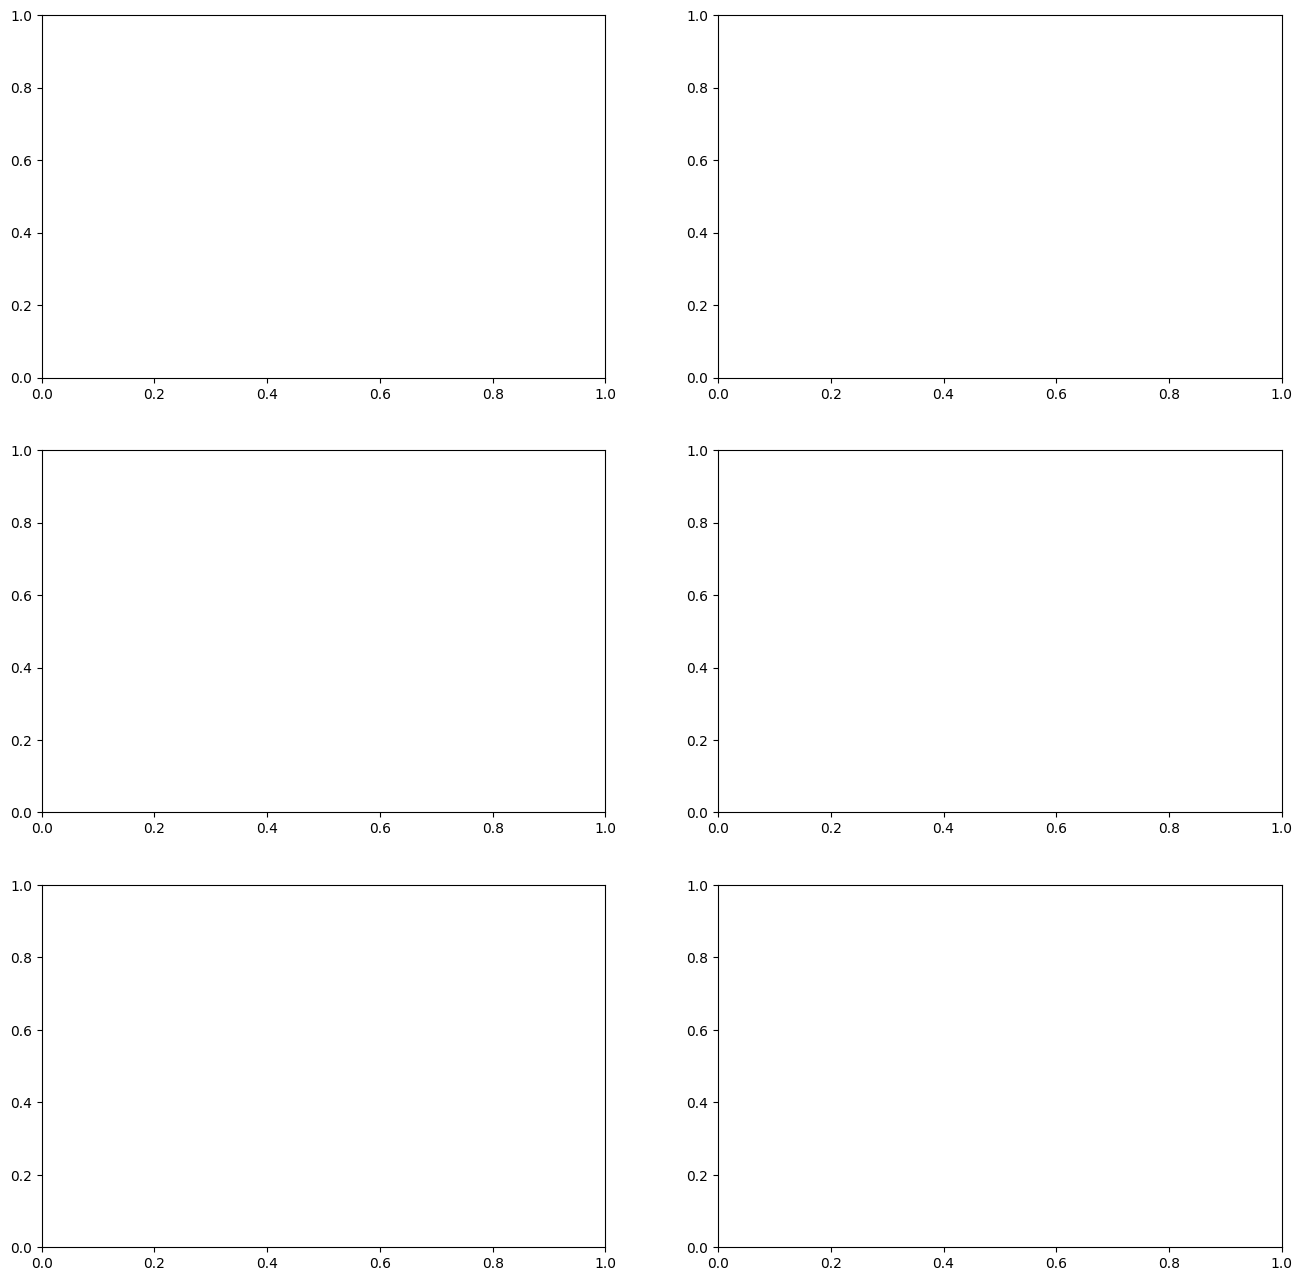

In [42]:
#TO PLOT PANEL - NOT WORKING
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("ICAR2f.csv")
#dates = pd.date_range(start='2022-01-01', end='2023-11-13', periods=30)

# Create a figure and a set of subplots
fig, axs = plt.subplots(3, 2, figsize=(16, 16))


# SUBPLOT1, animal 1
# Plot the first y-axis (Milk Yield)
ax1 = axs[0,0]
ax1.scatter(df['Start1'], df['DTY1'], c=df['Lact1'])
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Total Daily Milk Yield, kg per day', fontsize=15)
ax1.tick_params(axis='y')
ax1.xticks(rotation=45)
plt.title('Total Daily Milk Yield With Mean Temperature', fontsize=20)
ax1.set_title('Total Daily Milk Yield With Mean Temperature, \nSE-a624fb9a-1197', fontsize=15)

plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx() # instantiate a second Axes that shares the same x-axis
ax2.plot(df['Start1'], df['MT1'], color='r')
ax2.set_ylabel('Mean Temperature, °C', fontsize=15)
ax2.tick_params(axis='y')

# Adjust layout to prevent overlap
fig.tight_layout()
plt.show()

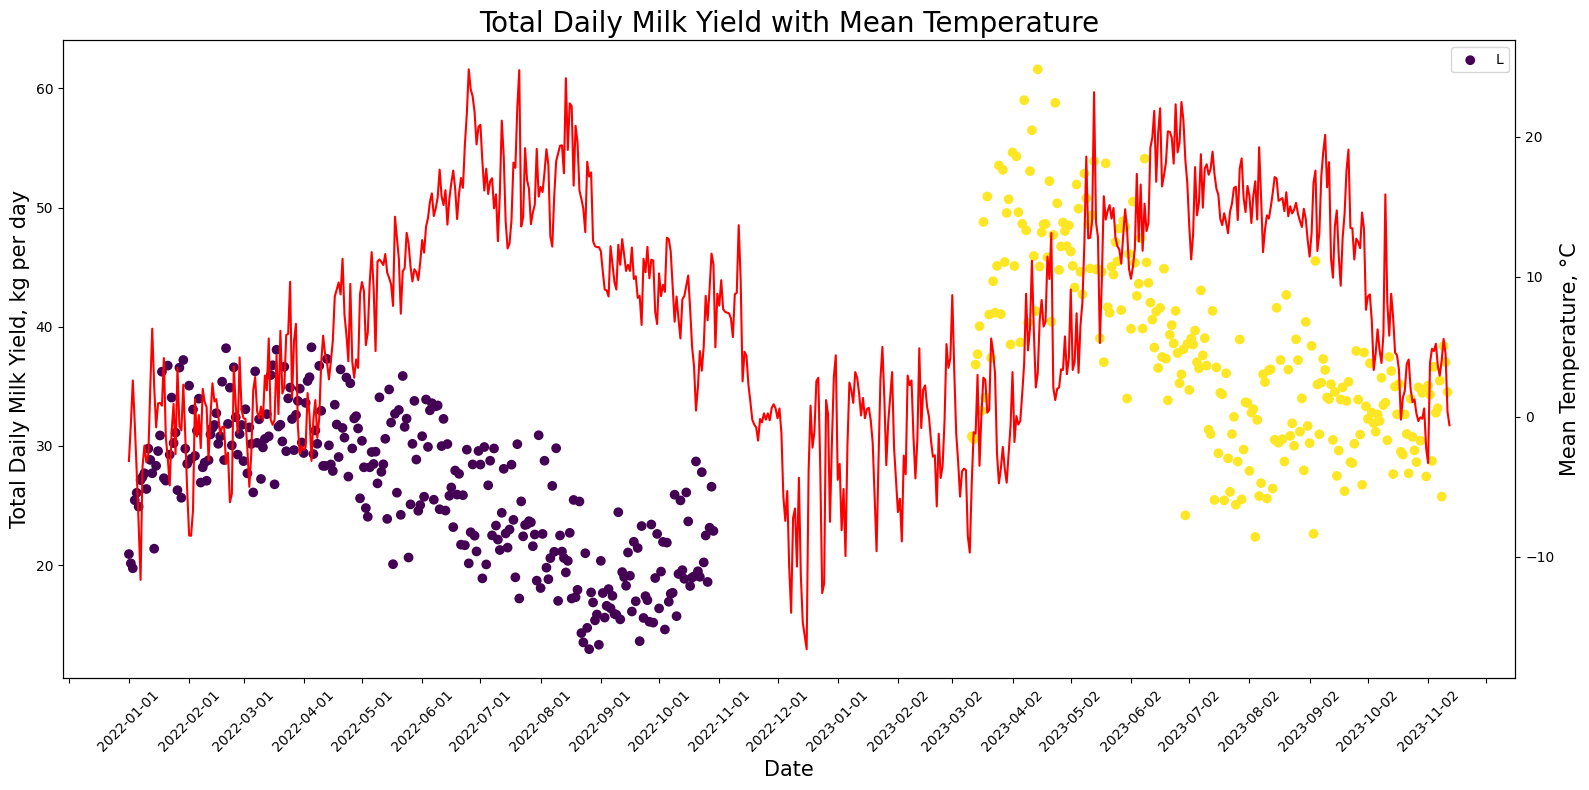

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("ICAR2e.csv")
#dates = pd.date_range(start='2022-01-01', end='2023-11-13', periods=30)

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(16, 8))

# Plot the first y-axis (Milk Yield)
ax1.scatter(df['StartDate'], df['DailyTotalYield'], c=df['LactationNumber'])
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Total Daily Milk Yield, kg per day', fontsize=15)
ax1.tick_params(axis='y')
plt.xticks(rotation=45)
plt.title('Total Daily Milk Yield with Mean Temperature', fontsize=20)

plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx() # instantiate a second Axes that shares the same x-axis
ax2.plot(df['StartDate'], df['MeanTemperature_y'], color='r')
ax2.set_ylabel('Mean Temperature, °C', fontsize=15)
ax2.tick_params(axis='y')

# Adjust layout to prevent overlap
fig.tight_layout()
plt.show()

In [29]:
#WEATHER DATA - HERD f454e660
import pandas as pd
dfw = pd.read_csv("C:/Users/pagd0001/Desktop/repositories/first_try/Gigacow-tools/Projects/HeatStressEvaluation/Data/TheData.csv")
print(dfw)

#SUBSET CHOSEN HERD
FarmName_Pseudo = ["f454e660"] 
dfw2 = dfw[dfw["FarmName_Pseudo"].isin(FarmName_Pseudo)]

#SORT BY StartDate
dfw3 = dfw2.sort_values(by=['FarmName_Pseudo', "SE_Number", 'StartDate', "StartTime"]) #dfw

DATA = dfw3.copy()

agg_functions = {
        'FarmName_Pseudo': 'first',
        'TotalYield': ['sum', 'mean'], # Daily sum of all the yields. Can be replaced with 'mean' to get daily mean instead
        'HW': 'first', # Since the HW indicator will be the same for all instances of the same day (given the same farm), we save the 'first'
        'cum_HW': 'first', # Same as for 'HW'
        'DaysInMilk': 'first', # Same as for 'HW'
        'LactationNumber': 'first', # Same as for 'HW'
        'Temperature': ['mean', 'max', 'min'], #Save both the daily Max temperature as well as daily mean temperature
        'Relative Humidity': 'mean', # Save daily mean humidity
        'THI_adj': 'mean' # save daily mean THI-adjusted
    }

breed_dummies = pd.get_dummies(DATA['BreedName'], prefix='Breed').astype(int)
breed_agg_functions = {breed: 'first' for breed in list(breed_dummies.columns)}
DATA = pd.get_dummies(DATA, columns=['BreedName'], prefix='Breed', dtype=int)

agg_functions = {**agg_functions, **breed_agg_functions}
daily_DATA = DATA.groupby(['SE_Number', 'StartDate']).agg(agg_functions).reset_index() #Group by day (StartDate)

# Remove the weird 'first' prefixes from the column names
daily_DATA.columns = [' '.join(col).strip() if 'first' not in col[1] else col[0] for col in daily_DATA.columns.values]

new_col_names = {
    'TotalYield sum': 'DailyTotalYield',
    'TotalYield mean': 'DailyMeanMilkYield',
    'DaysInMilk first': 'DaysInMilk',
    'Temperature mean': 'MeanTemperature',
    'Temperature max': 'MaxTemperature',
    'Temperature min': 'MinTemperature',
    'Relative Humidity mean': 'MeanRelHumidity',
    'THI_adj mean': 'MeanTHI_adj'
}

daily_DATA.rename(columns=new_col_names, inplace=True)
print(daily_DATA.head)
print(daily_DATA.shape) #144502, 19 #60495, 16

col_keep = ["StartDate", "FarmName_Pseudo", "SE_Number","MeanTemperature", "MaxTemperature", "MinTemperature", "MeanRelHumidity", "MeanTHI_adj"]
daily_DATA2 = daily_DATA[col_keep]
print(daily_DATA2)

# Save under 'Preprocessing' as 'ICAR_weather.csv'
daily_DATA2.to_csv("ICAR_weather_f454e660.csv", index=False) #ICAR2_weather.csv

       FarmName_Pseudo         SE_Number  AnimalNumber   StartDate StartTime  \
0             a624fb9a  SE-a624fb9a-1273          1273  2022-02-18  11:03:00   
1             a624fb9a  SE-a624fb9a-1405          1405  2022-05-19  12:04:00   
2             a624fb9a  SE-064c0cec-1189          5189  2022-08-05  12:41:00   
3             a624fb9a  SE-a624fb9a-1394          1394  2022-03-22  20:20:00   
4             a624fb9a  SE-a624fb9a-1408          1408  2022-04-25  15:30:00   
...                ...               ...           ...         ...       ...   
371001        f454e660  SE-f454e660-0508           508  2023-11-13  00:38:00   
371002        f454e660  SE-f454e660-0338           338  2023-11-13  00:46:00   
371003        f454e660  SE-f454e660-0710           710  2023-11-13  00:46:00   
371004        f454e660  SE-f454e660-0157           157  2023-11-13  00:52:00   
371005        f454e660  SE-f454e660-0487           487  2023-11-13  00:53:00   

        LactationNumber  DaysInMilk  To

In [30]:
"""
#SUBSET CHOSEN COW(S)
SE_Number = ["SE-f454e660-0157", "SE-f454e660-0235", "SE-f454e660-0444", "SE-f454e660-0477", "SE-f454e660-0652", "SE-f454e660-0706"]  
daily_DATA = daily_DATA[daily_DATA["SE_Number"].isin(SE_Number)]
"""
## Remove duplicate rows based on specific columns, and sort
df_unique = daily_DATA2.drop_duplicates(subset=['FarmName_Pseudo', 'StartDate'])
df_unique ["StartDate"] = pd.to_datetime(df_unique ["StartDate"], format="%Y-%m-%d")
df_unique.sort_values(by=["StartDate"], ascending=[True], inplace=True)
df_unique.drop(columns=["SE_Number"], inplace=True)
df_unique.to_csv("ICAR_weather_f454e660.csv", index=False) #ICAR3_weather.csv

C:\Users\pagd0001\AppData\Local\Temp\ipykernel_17340\3732747346.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique ["StartDate"] = pd.to_datetime(df_unique ["StartDate"], format="%Y-%m-%d")
C:\Users\pagd0001\AppData\Local\Temp\ipykernel_17340\3732747346.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique.sort_values(by=["StartDate"], ascending=[True], inplace=True)
C:\Users\pagd0001\AppData\Local\Temp\ipykernel_17340\3732747346.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

In [28]:
col_keep = ["StartDate", "FarmName_Pseudo", "SE_Number","DailyTotalYield", "LactationNumber"]
daily_DATA3 = daily_DATA[col_keep]
print(daily_DATA3)
print(daily_DATA3.dtypes)

#ADD MISSING VALUES FOR DATES
#Adding Date Variable for Each Animal Separately
cols = ['SE_Number','StartDate']
start_date = '2022-01-01'
end_date = '2023-11-13'

daily_DATA3['StartDate'] = pd.to_datetime(daily_DATA3['StartDate'])

daily_DATA4 = (daily_DATA3.set_index(cols)
      .reindex(pd.MultiIndex.from_product([daily_DATA3['SE_Number'].unique(),pd.date_range(start_date,end_date,freq='D')],names = cols))
      .fillna(0)
      .sort_index()
      .reset_index())

#set herd name and stuff to missing between lactations
daily_DATA4.loc[(daily_DATA4["FarmName_Pseudo"] == 0), "FarmName_Pseudo"] = "f454e660"
daily_DATA4.loc[(daily_DATA4["DailyTotalYield"] == 0.0) & (daily_DATA4["LactationNumber"] == 0.0),
    ["DailyTotalYield", "LactationNumber"]] = pd.NA

daily_DATA4.to_csv("ICAR3b.csv", index=False) #ICAR3b

        StartDate FarmName_Pseudo           SE_Number  DailyTotalYield  \
0      2022-01-01        f454e660     SE-7fd04cd3-679            12.93   
1      2022-01-02        f454e660     SE-7fd04cd3-679            13.72   
2      2022-01-03        f454e660     SE-7fd04cd3-679            14.19   
3      2022-01-01        f454e660    SE-a2bab923-0680            36.88   
4      2022-01-02        f454e660    SE-a2bab923-0680            19.70   
...           ...             ...                 ...              ...   
84002  2023-06-08        f454e660  SE-fcdf259d-0044-0            15.14   
84003  2023-06-09        f454e660  SE-fcdf259d-0044-0             7.47   
84004  2023-06-10        f454e660  SE-fcdf259d-0044-0            14.73   
84005  2023-06-12        f454e660  SE-fcdf259d-0044-0            12.27   
84006  2023-06-13        f454e660  SE-fcdf259d-0044-0             7.96   

       LactationNumber  
0                    4  
1                    4  
2                    4  
3          

C:\Users\pagd0001\AppData\Local\Temp\ipykernel_17340\1300255435.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_DATA3['StartDate'] = pd.to_datetime(daily_DATA3['StartDate'])


In [32]:
#Load data
df_unique=pd.read_csv("ICAR_weather_f454e660.csv")
df8 = pd.read_csv("ICAR3b.csv")

# convert to datetime format
df8["StartDate"] = pd.to_datetime(df8["StartDate"])
df_unique["StartDate"] = pd.to_datetime(df_unique["StartDate"])

#MERGE
df10 = df8.merge(df_unique, on=["FarmName_Pseudo", "StartDate"], how="outer")
print(df10.head())
print(df10.shape) #106392, 16

df10.to_csv("ICAR_weather_f454e660.csv", index=False) #ICAR3d

          SE_Number  StartDate FarmName_Pseudo  DailyTotalYield  \
0   SE-7fd04cd3-679 2022-01-01        f454e660            12.93   
1  SE-a2bab923-0680 2022-01-01        f454e660            36.88   
2  SE-f454e660-0139 2022-01-01        f454e660            33.45   
3  SE-f454e660-0157 2022-01-01        f454e660            42.24   
4  SE-f454e660-0235 2022-01-01        f454e660            40.71   

   LactationNumber  MeanTemperature  MaxTemperature  MinTemperature  \
0              4.0              1.2             1.2             1.2   
1              8.0              1.2             1.2             1.2   
2              5.0              1.2             1.2             1.2   
3              5.0              1.2             1.2             1.2   
4              4.0              1.2             1.2             1.2   

   MeanRelHumidity  MeanTHI_adj  
0            0.817     35.98532  
1            0.817     35.98532  
2            0.817     35.98532  
3            0.817     35.98532  


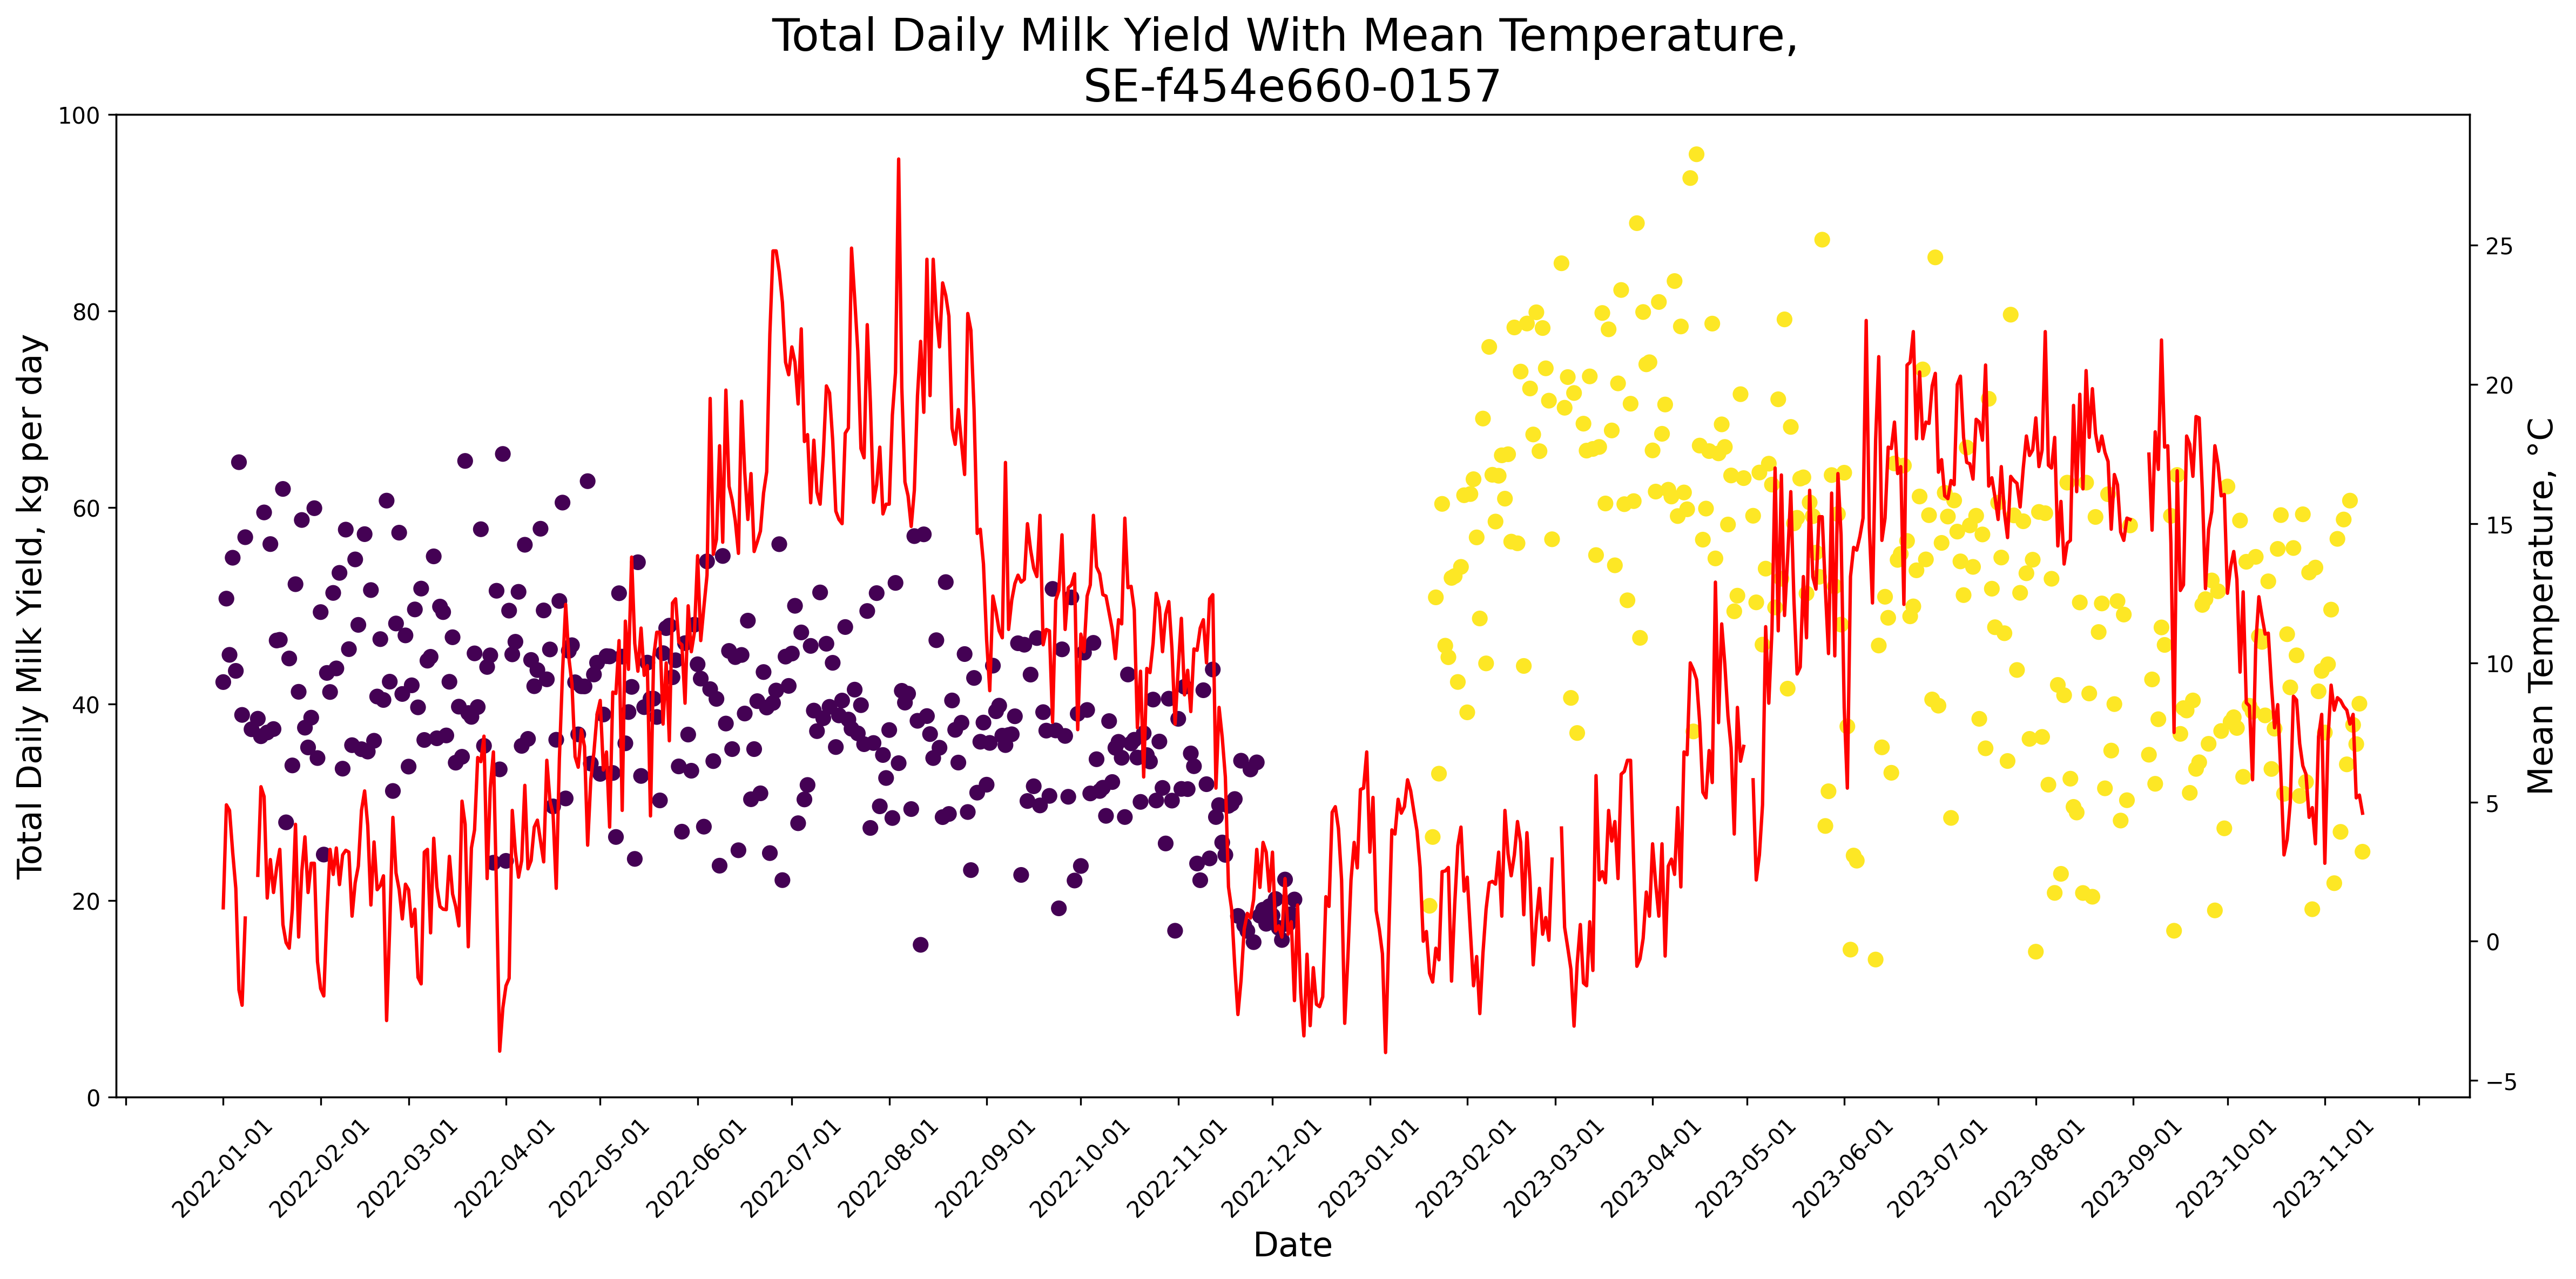

In [33]:
#PLOT MY x MEANTEMP
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("ICAR_weather_f454e660.csv") #ICAR3d
#SUBSET CHOSEN COW(S)
SE_Number = ["SE-f454e660-0157"]  #SE-a624fb9a-1273"] #"SE-a624fb9a-1412"] # "SE-a624fb9a-1426"] # 
df = df[df["SE_Number"].isin(SE_Number)]
df.to_csv("ICAR3e.csv", index=False)

#dates = pd.date_range(start='2022-01-01', end='2023-11-13', periods=30)

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(16, 8), dpi=300)

# Plot the first y-axis (Milk Yield)
ax1.scatter(df['StartDate'], df['DailyTotalYield'], c=df['LactationNumber'])
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Total Daily Milk Yield, kg per day', fontsize=15)
ax1.tick_params(axis='y')
ax1.set_ylim(0,100)
plt.xticks(rotation=45)
plt.title('Total Daily Milk Yield With Mean Temperature, \nSE-f454e660-0157', fontsize=20)
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx() # instantiate a second Axes that shares the same x-axis
ax2.plot(df['StartDate'], df['MeanTemperature'], color='r')
ax2.set_ylabel('Mean Temperature, °C', fontsize=15)
ax2.tick_params(axis='y')

# Adjust layout to prevent overlap
fig.tight_layout()
plt.show()

In [116]:
#VMS DATA FOR HERD f454e660 FOR SCC GRAPHS
import pandas as pd
df_vms = pd.read_csv("C:/Users/pagd0001/Desktop/repositories/first_try/Gigacow-tools/Projects/HeatStressEvaluation/Data/CowData/GIGACOW/Robot_filtered.csv")

#Convert the 'date_time' column to datetime format
df_vms['DateTime'] = pd.to_datetime(df_vms['DateTime'])
# Extract the date part and create a new column 'date'
df_vms['Date'] = df_vms['DateTime'].dt.date
df_vms['Time'] = df_vms['DateTime'].dt.time

col_keep = ["FarmName_Pseudo","SE_Number", "TotalYield", "Occ", "Date", "Time"]
df_vms = df_vms[col_keep]
print(df_vms)

# convert the 'TotalYield' to numeric format and replace commas with dots to handle decimal notation
# and finally use 'errors='coerce' to replace any conversion errors with NaN values
df_vms["TotalYield"] = pd.to_numeric(df_vms["TotalYield"].str.replace(",", "."), errors="coerce")

# convert to datetime format
df_vms["Date"] = pd.to_datetime(df_vms["Date"])

df_vms.sort_values(by=["SE_Number","Date"], inplace=True)
print(df_vms.dtypes)

C:\Users\pagd0001\AppData\Local\Temp\ipykernel_17340\2766201583.py:3: DtypeWarning: Columns (53) have mixed types. Specify dtype option on import or set low_memory=False.
  df_vms = pd.read_csv("C:/Users/pagd0001/Desktop/repositories/first_try/Gigacow-tools/Projects/HeatStressEvaluation/Data/CowData/GIGACOW/Robot_filtered.csv")


       FarmName_Pseudo         SE_Number TotalYield    Occ        Date  \
0             a624fb9a  SE-a624fb9a-1412       0,45    NaN  2022-04-14   
1             a624fb9a  SE-a624fb9a-1273      23,79   11.0  2022-02-18   
2             a624fb9a  SE-a624fb9a-1405       11,7    NaN  2022-05-19   
3             f454e660   SE-f454e660-410       9,29   54.0  2022-03-08   
4             f454e660   SE-f454e660-578       2,52    NaN  2022-01-22   
...                ...               ...        ...    ...         ...   
391322        f454e660  SE-f454e660-0706        NaN    NaN  2023-11-13   
391323        f454e660  SE-f454e660-0616      18,35    NaN  2023-11-13   
391324        a624fb9a  SE-a624fb9a-1500       9,23  205.0  2023-11-13   
391325        f454e660  SE-f454e660-0705       9,33    NaN  2023-11-13   
391326        f454e660  SE-f454e660-0750      11,54    NaN  2023-11-13   

            Time  
0       17:43:00  
1       11:03:00  
2       12:04:00  
3       18:27:00  
4       10:27:00

In [117]:
# Summarize daily milk yield by cow and date
MY_tot = df_vms.groupby(["SE_Number",'Date'])['TotalYield'].sum()

# Merge the summarized data back into the original DataFrame
df_vms = df_vms.merge(MY_tot, on='Date', suffixes=('', ' sum'))
print(df_vms)
print(df_vms.dtypes)

#Keep only one obs per day
df_vms = df_vms.drop_duplicates(subset=["SE_Number", "Date"], keep="first")
print(df_vms)
print(df_vms.shape)

df_vms.drop(columns=["TotalYield", "Time"], inplace=True)
print(df_vms)

df_vms.to_csv("ICAR_f454e660_SCC.csv", index=False)

         FarmName_Pseudo           SE_Number  TotalYield    Occ       Date  \
0               a624fb9a    SE-064c0cec-1189       13.90  125.0 2022-01-01   
1               a624fb9a    SE-064c0cec-1189       13.90  125.0 2022-01-01   
2               a624fb9a    SE-064c0cec-1189       13.90  125.0 2022-01-01   
3               a624fb9a    SE-064c0cec-1189       13.90  125.0 2022-01-01   
4               a624fb9a    SE-064c0cec-1189       13.90  125.0 2022-01-01   
...                  ...                 ...         ...    ...        ...   
83602319        f454e660  SE-fcdf259d-0044-0        7.96    NaN 2023-06-13   
83602320        f454e660  SE-fcdf259d-0044-0        7.96    NaN 2023-06-13   
83602321        f454e660  SE-fcdf259d-0044-0        7.96    NaN 2023-06-13   
83602322        f454e660  SE-fcdf259d-0044-0        7.96    NaN 2023-06-13   
83602323        f454e660  SE-fcdf259d-0044-0        7.96    NaN 2023-06-13   

              Time  TotalYield sum  
0         06:25:00        

In [118]:
#INSERT MISSING VALUES BETWEEN LACT
import pandas as pd
df_vms=pd.read_csv("ICAR_f454e660_SCC.csv")

#Adding Date Variable for Each Animal Separately
cols = ['SE_Number','Date']
start_date = '2022-01-01'
end_date = '2023-11-13'

df_vms['Date'] = pd.to_datetime(df_vms['Date'])

daily_DATA4 = (df_vms.set_index(cols)
      .reindex(pd.MultiIndex.from_product([df_vms['SE_Number'].unique(),pd.date_range(start_date,end_date,freq='D')],names = cols))
      #.fillna()
      .sort_index()
      .reset_index())

daily_DATA4.loc[(daily_DATA4["FarmName_Pseudo"] == 0), "FarmName_Pseudo"] = "f454e660"
daily_DATA4.loc[(daily_DATA4["Occ"] == 0.0) & (daily_DATA4["TotalYield sum"] == 0.0),
    ["Occ", "TotalYield sum"]] = pd.NA

daily_DATA4.to_csv("ICAR_f454e660_SCC.csv", index=False)

In [119]:
#SUBSET CHOSEN COW(S)
df_vms = pd.read_csv("ICAR_f454e660_SCC.csv")
SE_Number = ["SE-f454e660-0706"] 
df = df_vms[df_vms["SE_Number"].isin(SE_Number)]

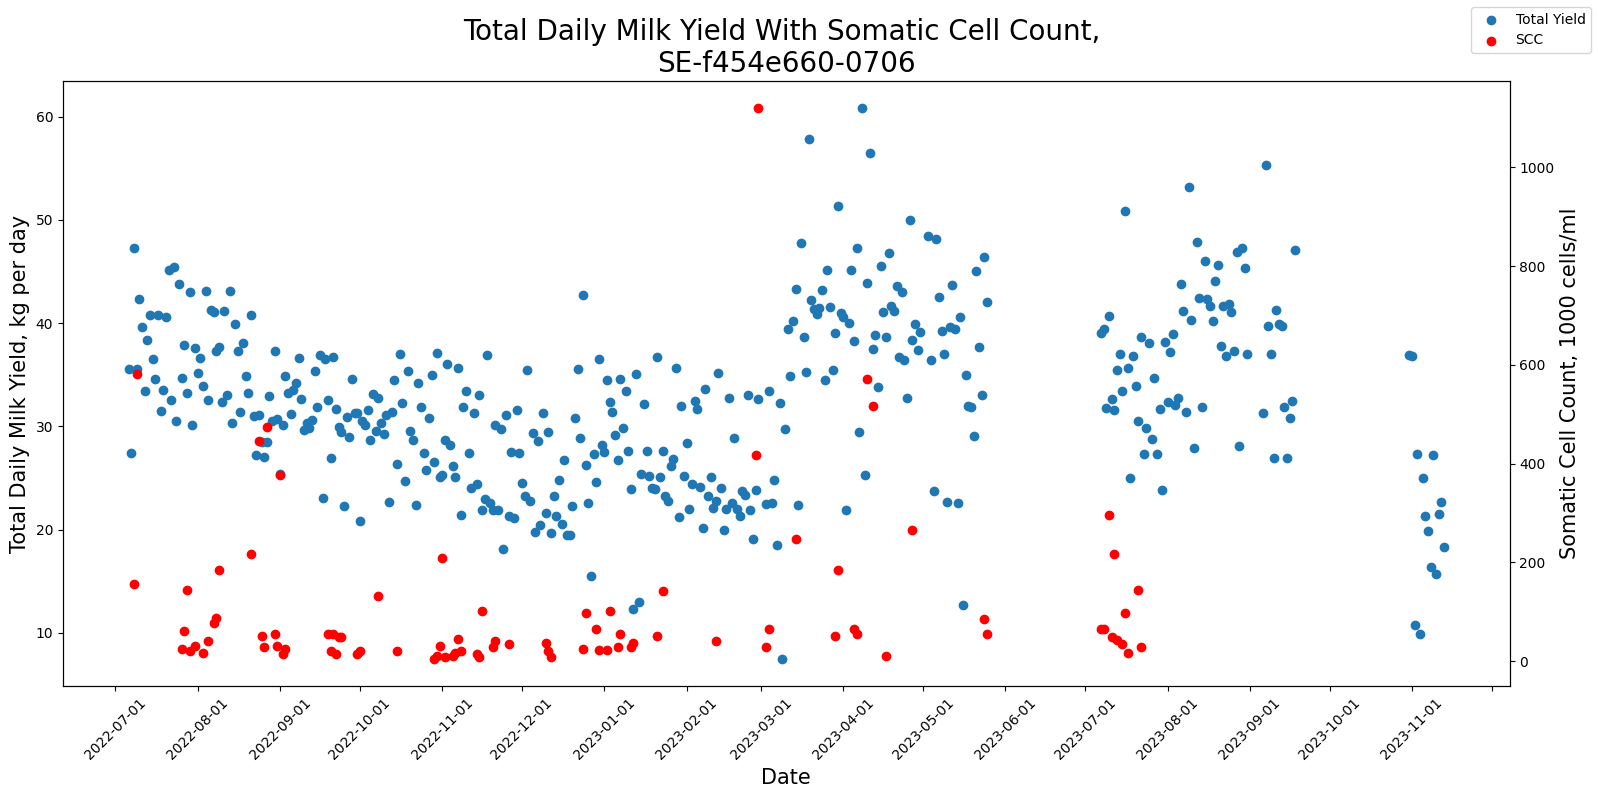

In [120]:
#SCATTER PLOT OF SCC
import pandas as pd
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(16, 8))

# Plot the first y-axis (Milk Yield)
ax1.scatter(df['Date'], df['TotalYield sum'], label="Total Yield")
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Total Daily Milk Yield, kg per day', fontsize=15)
ax1.tick_params(axis='y')
plt.xticks(rotation=45)
plt.title('Total Daily Milk Yield With Somatic Cell Count, \nSE-f454e660-0706', fontsize=20)
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx() # instantiate a second Axes that shares the same x-axis
ax2.scatter(df['Date'], df['Occ'], color='r', label="SCC")
ax2.set_ylabel('Somatic Cell Count, 1000 cells/ml', fontsize=15)
ax2.tick_params(axis='y')
fig.legend()

# Adjust layout to prevent overlap
fig.tight_layout()
plt.show()

C:\Users\pagd0001\AppData\Local\Temp\ipykernel_17340\4053079958.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occ_interpolated'] = df['Occ'].interpolate()


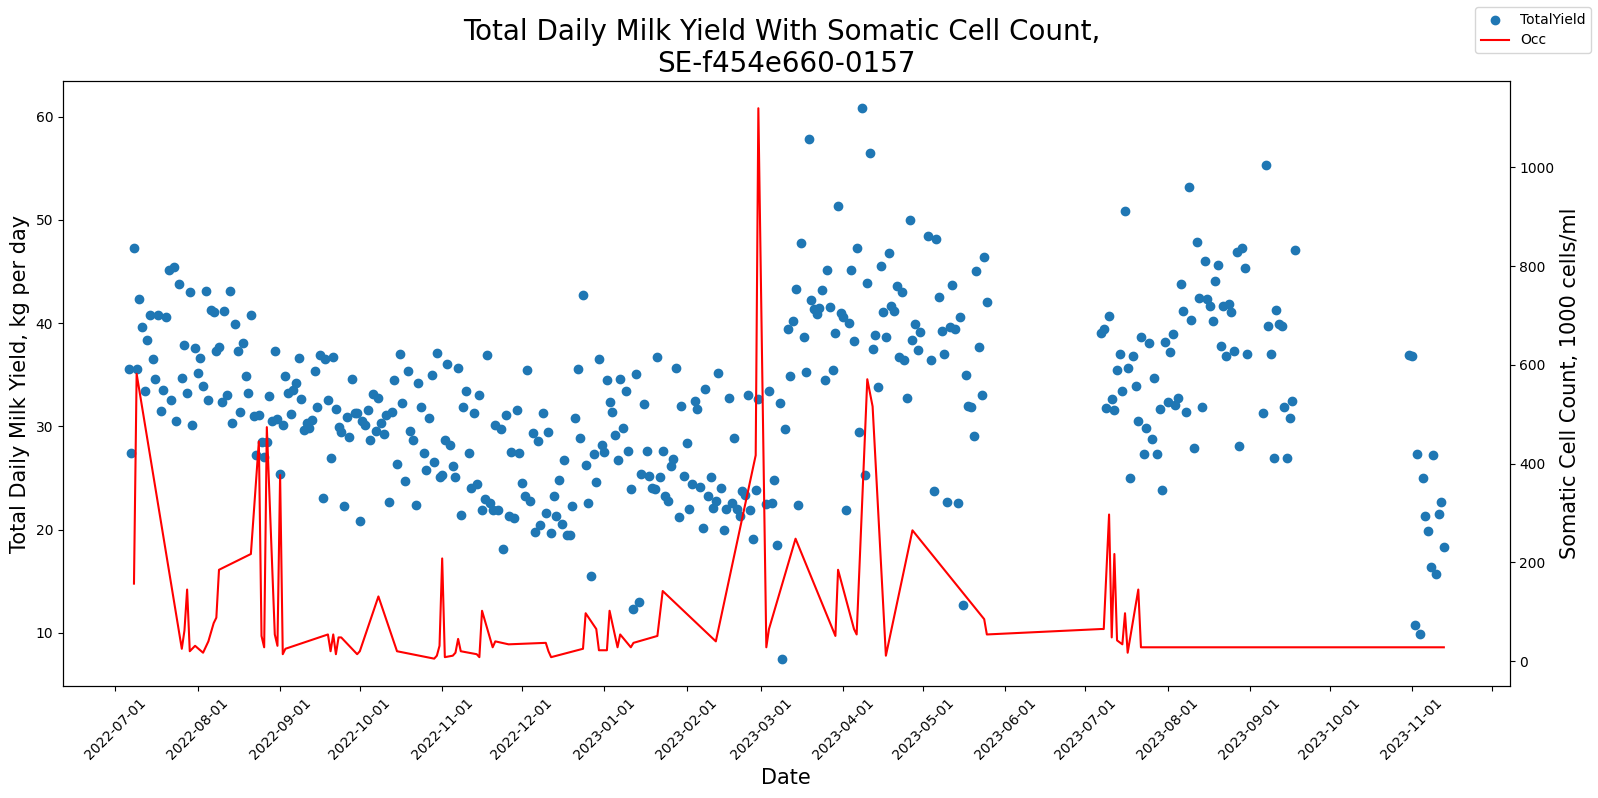

In [121]:
#PLOTTING SCC WITH INTERPOLATION
import pandas as pd
import matplotlib.pyplot as plt

# Interpolate missing values of SCC
df['Occ_interpolated'] = df['Occ'].interpolate()

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(16, 8))

# Plot the first y-axis (Milk Yield)
ax1.scatter(df['Date'], df['TotalYield sum'], label="TotalYield")
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Total Daily Milk Yield, kg per day', fontsize=15)
ax1.tick_params(axis='y')
plt.xticks(rotation=45)
plt.title('Total Daily Milk Yield With Somatic Cell Count, \nSE-f454e660-0157', fontsize=20)
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())


# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx() # instantiate a second Axes that shares the same x-axis
ax2.plot(df['Date'], df['Occ_interpolated'], color='r', label="Occ")
ax2.set_ylabel('Somatic Cell Count, 1000 cells/ml', fontsize=15)
ax2.tick_params(axis='y')
fig.legend()

# Adjust layout to prevent overlap
fig.tight_layout()
plt.show()